In [162]:
#All import statements
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [201]:
#Read the csv file and create feature / label sets
X = pd.read_csv('HR_comma_sep.csv')
display(X.head())

Y = X['left']

print 'Number of records: ', X.shape[0]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Number of records:  14999


**We first need to understand data - lets do describe on data. Then we will describe for people who have left (i.e. 0 and 1)**

In [203]:
X.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [210]:
X[X['left'] == 0].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [211]:
X[X['left'] == 1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


**Nothing alarming pops up here:**
* Satisfaction Level: Works as expected, higher the satisfaction, left should become 0. We sould plot this.
* Last evalution and number of projects: No impact based on data
* Avg. monthly hours: as it increases, left tends to move towards 1. We sould plot this.
* Promotion: People with promoations have tended to stay - we should plot this.


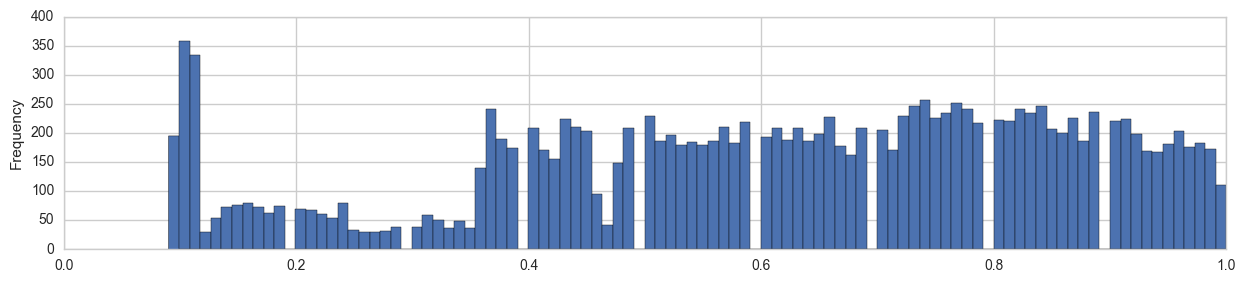

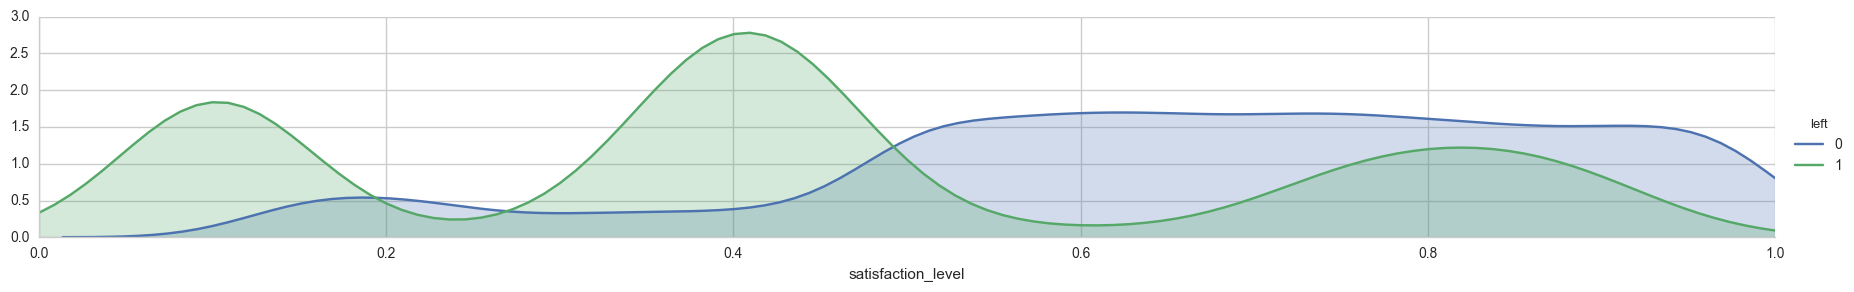

In [228]:
#Plot 1: Left Vs Satisfaction level

#Frequency / Count 
X['satisfaction_level'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,1))

# peaks for left/notleft by Satisfaction leve
facet = sns.FacetGrid(X, hue="left",aspect=6)
facet.map(sns.kdeplot,'satisfaction_level',shade= True)
facet.set(xlim=(0, 1))
facet.add_legend()



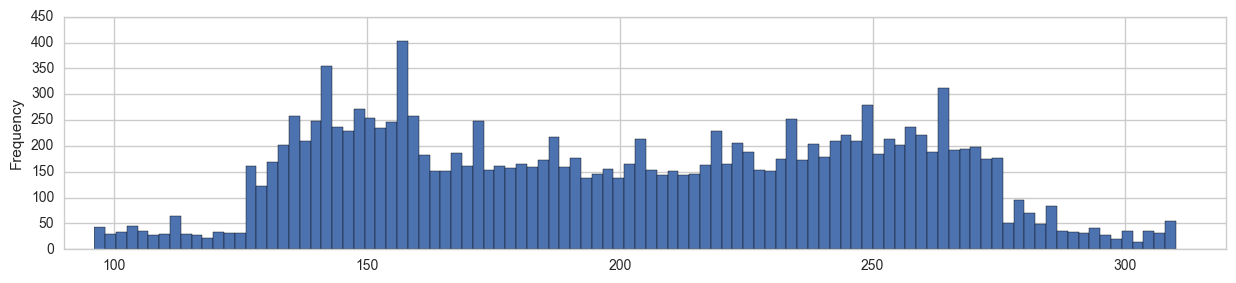

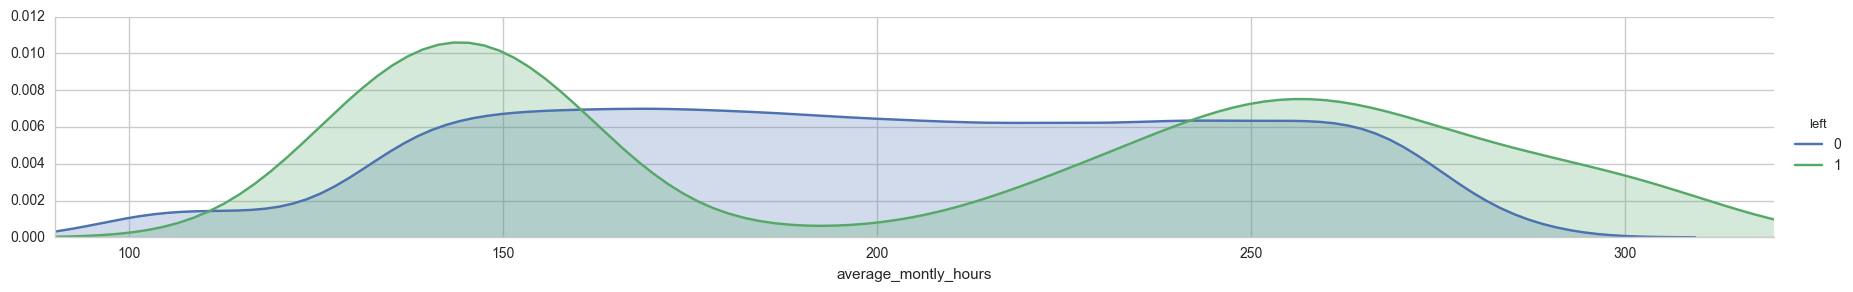

In [225]:
#Plot 2: Left Vs Avg. Monthly hours

#Frequency / Count 
X['average_montly_hours'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(90,320))

# peaks for left/notleft by avg. hours
facet = sns.FacetGrid(X, hue="left",aspect=6)
facet.map(sns.kdeplot,'average_montly_hours',shade= True)
facet.set(xlim=(90, 320))
facet.add_legend()



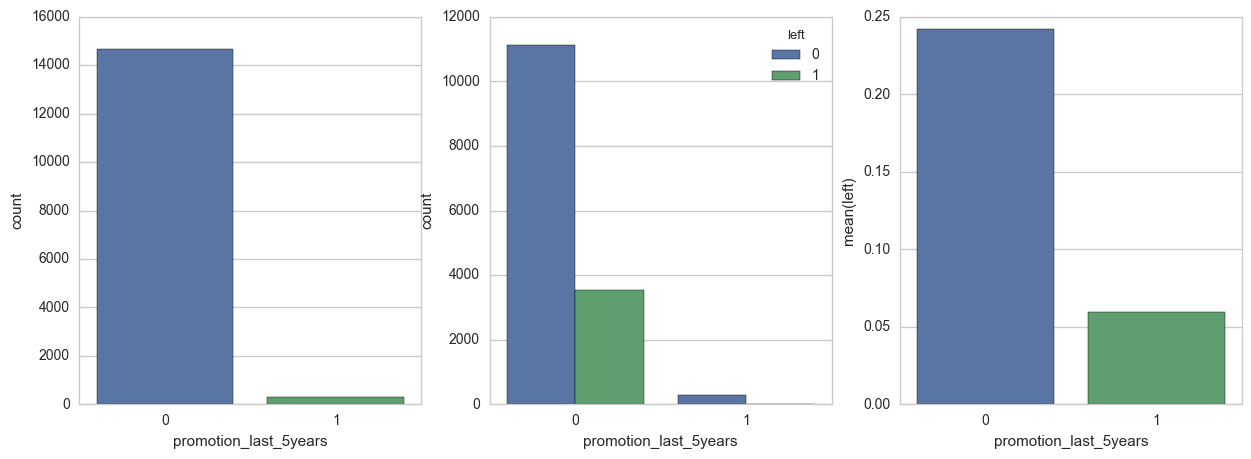

In [229]:
#Plot 3: Left Vs Promotion
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#Count / Frequency
sns.countplot(x="promotion_last_5years", data=X, ax=axis1)

#Count of people with Promotions Vs Left
sns.countplot(x="promotion_last_5years", hue="left", data=X, ax=axis2)

#Mean Left Vs Promotion
promotion_data = X[["promotion_last_5years", "left"]].groupby(['promotion_last_5years'],as_index=False).mean()
sns.barplot(x="promotion_last_5years", y="left", data=promotion_data,ax=axis3)


**You might have observed that not all columns have been considered yet. Sales and Salary are left. Let's do a dtypes on X:**

In [233]:
X.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [165]:
#Let's check the object / string columns: sales and salary for any null values

display(X.groupby(['sales']).size())
display(X.groupby(['salary']).size())

#No null / NAN values so no manipulation needed

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

salary
high      1237
low       7316
medium    6446
dtype: int64

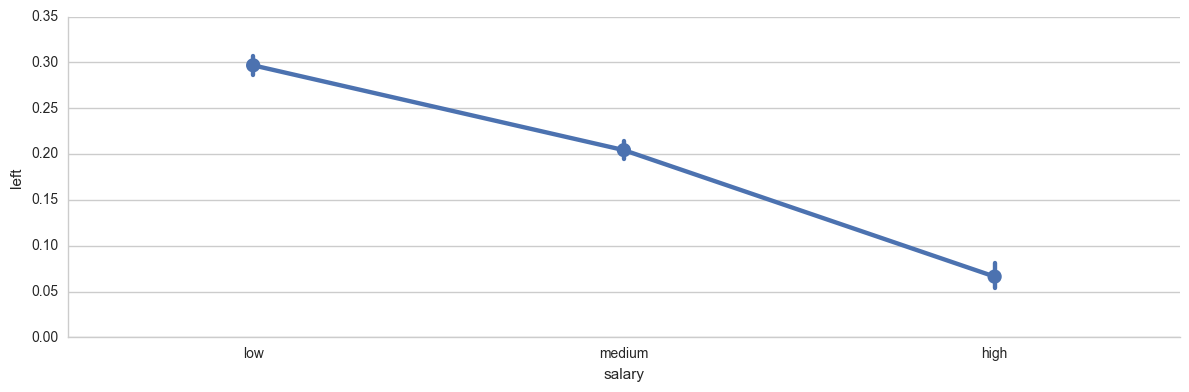

In [234]:
#Understand the relationship between salary and left
sns.factorplot(x="salary", y="left", data=X, size=4, aspect=3)

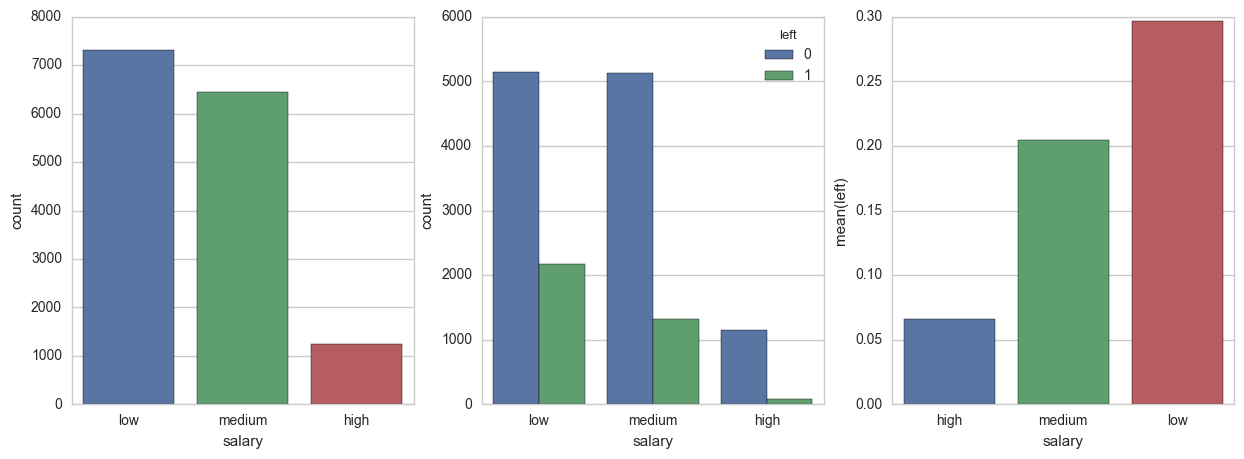

In [236]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.countplot(x="salary", data=X, ax=axis1)
sns.countplot(x="salary", hue="left", data=X, ax=axis2)
salary_data = X[["salary", "left"]].groupby(['salary'],as_index=False).mean()
sns.barplot(x="salary", y="left", data=salary_data, order=['high','medium','low'],ax=axis3)


**So, lower the salary, higher the left. Now let's do the same for Sales.** 

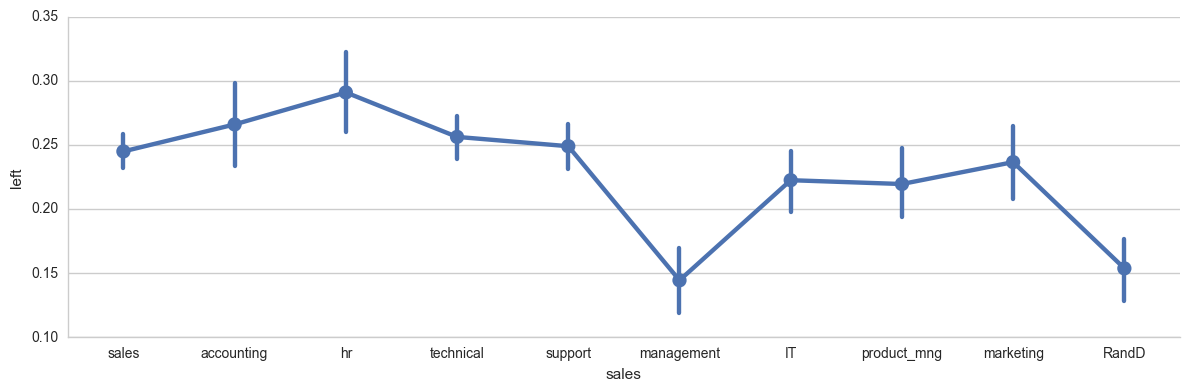

In [237]:
#Understand the relationship between sales and left
sns.factorplot(x="sales", y="left", data=X, size=4, aspect=3)

**Not much is revealed HR has the maximum value for "left", while Management & RandD have the lowest "left".**

*Let's break up our set into training and test set as we only have one file*

In [238]:
X = X.drop('left', axis = 1)
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.4, random_state=0)
print 'Training set volume:', X_train.shape[0]
print 'Test set volume:', X_test.shape[0]

Training set volume: 8999
Test set volume: 6000


In [239]:
#Transpose for Salary and Sales

## Salary
salary_dummies_training = pd.get_dummies(X_train["salary"])
salary_dummies_test = pd.get_dummies(X_test["salary"])
#display(salary_dummies_training.head())
X_train = X_train.merge(salary_dummies_training, on=X_train.index.get_values(), how = 'left')
X_test = X_test.merge(salary_dummies_test, on=X_test.index.get_values(), how = 'left')

## Sales
sales_dummies_training = pd.get_dummies(X_train["sales"])
sales_dummies_test = pd.get_dummies(X_test["sales"])
#display(sales_dummies_training.head())
X_train = X_train.merge(sales_dummies_training, on=X_train.key_0, how = 'left')
X_test = X_test.merge(sales_dummies_test, on=X_test.key_0, how = 'left')
display(X_train.head())


,key_0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_x,salary,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales_y,support,technical
0,4434,0.66,0.68,4,152,3,0,0,marketing,high,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,738,0.11,0.87,6,257,4,0,0,support,medium,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10826,0.87,0.48,4,264,3,0,0,IT,medium,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13199,0.32,0.86,4,266,4,0,0,RandD,low,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13638,0.84,0.80,4,236,3,0,0,marketing,low,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Note that we have converted all the textual values in Sales and Salary into numbers by creating additional columns.**

*Now, we can drop unnecessary columns* 

In [240]:
X_train.dtypes
X_test.dtypes
X_train.drop(['salary'], axis=1, inplace=True)
X_test.drop(['salary'], axis=1, inplace=True)

X_train.drop(['sales_x'], axis=1, inplace=True)
X_test.drop(['sales_x'], axis=1, inplace=True)

In [241]:
#Confirm things are accurate
display(X_train.head())

,key_0,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,high,low,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales_y,support,technical
0,4434,0.66,0.68,4,152,3,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,738,0.11,0.87,6,257,4,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10826,0.87,0.48,4,264,3,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13199,0.32,0.86,4,266,4,0,0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13638,0.84,0.80,4,236,3,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [242]:
# Create Naive Bayes classifier
clf_gb = GaussianNB()
clf_gb.fit(X_train, Y_train)
predicts_gb = clf_gb.predict(X_test)
print "GB Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(Y_test, predicts_gb)

GB Accuracy Rate, which is calculated by accuracy_score() is: 0.821667


In [243]:
#Create k-nn
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print "KNN5 Accuracy Rate, which is calculated by accuracy_score() is: %f" %metrics.accuracy_score(Y_test,Y_pred)

KNN5 Accuracy Rate, which is calculated by accuracy_score() is: 0.998667


In [244]:
#Decision Tree
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, Y_train)
predicts_dt = clf_dt.predict(X_test)
print "Decision tree Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(Y_test, predicts_dt)


Decision tree Accuracy Rate, which is calculated by accuracy_score() is: 0.999000


In [245]:
#SVM
clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train,Y_train)
predicts_svm = clf_svm.predict(X_test)
print "SVM Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_score(Y_test, predicts_svm)


SVM Accuracy Rate, which is calculated by accuracy_score() is: 0.803333


In [246]:
#Random forest classifier
clf_rf = RandomForestClassifier(random_state = 0)
clf_rf.fit(X_train, Y_train)

accuracy_rf = clf_rf.score(X_test,Y_test)
print "Random Forest Accuracy Rate, which is calculated by accuracy_score() is: %f" % accuracy_rf


Random Forest Accuracy Rate, which is calculated by accuracy_score() is: 0.993833
